In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Word Vectors với Spacy

Spacy cung cấp một vài mô hình được huấn luyện trước
Danh sách các mô hình có thể được tìm thấy ở [đây](https://spacy.io/models)

In [ ]:
!python -m spacy download en_core_web_md # Tải mô hình

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [ ]:
import spacy
from spacy.lang.en.examples import sentences #Lấy ra một vài câu mẫu bằng tiếng anh trong thư viện spacy
spacy_model = spacy.load("en_core_web_md") # khai báo mô hình
print(sentences)

['Apple is looking at buying U.K. startup for $1 billion', 'Autonomous cars shift insurance liability toward manufacturers', 'San Francisco considers banning sidewalk delivery robots', 'London is a big city in the United Kingdom.', 'Where are you?', 'Who is the president of France?', 'What is the capital of the United States?', 'When was Barack Obama born?']


In [ ]:
doc = spacy_model(sentences[0]) # lấy một câu mẫu
print(doc.text)

Apple is looking at buying U.K. startup for $1 billion


# Đo độ tương đồng

In [ ]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,token2.text,token1.similarity(token2))

Apple Apple 1.0
Apple is 0.05453578010201454
Apple looking 0.06788017600774765
Apple at -0.0667598620057106
Apple buying 0.18188977241516113
Apple U.K. 0.2661571204662323
Apple startup 0.37477657198905945
Apple for 0.08796192705631256
Apple $ 0.1137550100684166
Apple 1 0.04619210213422775
Apple billion 0.15965835750102997
is Apple 0.05453578010201454
is is 1.0
is looking 0.1764160394668579
is at 0.00010808337538037449
is buying 0.1546841859817505
is U.K. 0.0028077641036361456
is startup 0.19866271317005157
is for 0.19366304576396942
is $ -0.10444630682468414
is 1 -0.1432768851518631
is billion -0.03349800407886505
looking Apple 0.06788017600774765
looking is 0.1764160394668579
looking looking 1.0
looking at 0.021999644115567207
looking buying 0.5924796462059021
looking U.K. 0.05828923359513283
looking startup 0.4177783131599426
looking for 0.32175692915916443
looking $ -0.06900154054164886
looking 1 -0.10546605288982391
looking billion 0.07781581580638885
at Apple -0.0667598620057106
a

In [ ]:
tokens = spacy_model('software computer mail hjhdgs')
for token in tokens:
    # in ra từ,từ có vec-tơ không, chuẩn của vec-tơ, có phải là từ nằm ngoài từ vựng không
    print(token.text,token.has_vector,token.vector_norm,token.is_oov)
    # token.vector để lấy ra cả vector

software True 46.668682 False
computer True 43.668007 False
mail True 71.324295 False
hjhdgs False 0.0 True


Gensim không cung cấp mô hình được huấn luyện trước word2vec. Các mô hình được cung cấp trực tuyến có thể sử dụng với Gensim. Một trong số đó là mô hình dữ liệu Google News cung cấp các véc-tơ được huấn luyện trước trên tập dữ liệu Google News (khoảng 100 tỷ từ). Mô hình chứa các véc-tơ 300 chiều cho cho 3 triệu từ và cụm từ.

Link tải mô hình Word Vector tại [đây](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)
[](https://code.google.com/archive/p/word2vec/)

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import KeyedVectors
gensim_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz',binary=True)

# Tìm độ tương đồng

Nếu man là king thì woman sẽ là gì ?

In [ ]:
gensim_model.most_similar(positive =['woman','king'],negative = ['man'],topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

Nếu Pháp liên quan tới Paris thì Italy sẽ liên quan tới?

In [ ]:
# Code here

Nếu boy là hoàng tử thì girl sẽ là gì?

In [ ]:
# Code here

Tìm ra ngôn ngữ của người Tây Ban Nha biết người Anh thì nói tiếng Anh?

In [ ]:
# Code here

# Tạo mô hình word2vec với Gensim

Dữ liệu chúng ta sử dụng là tóm tắt từ 6 nghìn tài liệu nghiên cứu được xuất bản trong lĩnh vực Khoa học thần kinh và Y sinh

## Chuẩn bị dữ liệu đầu vào

In [ ]:
import os
import glob
import re

In [ ]:
!unzip /content/drive/MyDrive/OpenCorpus.zip

Streaming output truncated to the last 5000 lines.
  inflating: OpenCorpus/3f396fc395a8b7d17735e129ffb6f3236e4d9e27.txt  
  inflating: OpenCorpus/3f4198ca266678d6487964712b8750a81fc0d310.txt  
  inflating: OpenCorpus/3f44135aa91c30a85e0cd92a1b93c47c7af373ec.txt  
  inflating: OpenCorpus/3f4a13abb1ce89a8e1e45484ae8f7843e88016a5.txt  
  inflating: OpenCorpus/3f526d8dcc20b0b1e1982712fe4917bb6527d1ff.txt  
  inflating: OpenCorpus/3f69c7328bbeb3a2816534d5b03e62e2132351e8.txt  
  inflating: OpenCorpus/3f6ab2bb708f3fc91d59c3f4d18aae72639186b8.txt  
  inflating: OpenCorpus/3f6c5243f9e19ff8ca7b2811356ffc9f8723a08a.txt  
  inflating: OpenCorpus/3f81c29ed898e14ddf31d95664a1530d7c6bf8a2.txt  
  inflating: OpenCorpus/3f81f3b69f60f64a8a9815883a2b4bc052106b04.txt  
  inflating: OpenCorpus/3f82442490a6384e119869b20a5071555f2cded3.txt  
  inflating: OpenCorpus/3f88091e60d07d161c6280f723985e92a8ee159f.txt  
  inflating: OpenCorpus/3f8edafa65f2b78e18cb114a863eb3d340895c02.txt  
  inflating: OpenCorpus/3f

In [ ]:
fname = "OpenCorpus/ff2c21e3e630b42a0a01c0d5ddc5768c0428cee6.txt"

In [ ]:
def inf_seq(fname):
    for line in open(fname, "r"):
        yield line
seq = inf_seq(fname)
seq

<generator object inf_seq at 0x79a901ae04a0>

In [ ]:
next(seq)

'Bayesian networks are a type of probabilistic graphical models lie at the intersection between statistics and machine learning. They have been shown to be powerful tools to encode dependence relationships among the variables of a domain under uncertainty. Thanks to their generality, Bayesian networks can accommodate continuous and discrete variables, as well as temporal processes. In this paper we review Bayesian networks and how they can be learned automatically from data by means of structure learning algorithms. Also, we examine how a user can take advantage of these networks for reasoning by exact or approximate inference algorithms that propagate the given evidence through the graphical structure. Despite their applicability in many fields, they have been little used in neuroscience, where they have focused on specific problems, like functional connectivity analysis from neuroimaging data. Here we survey key research in neuroscience where Bayesian networks have been used with dif

In [ ]:
for line in open(fname, "r"):
    print(line)

Bayesian networks are a type of probabilistic graphical models lie at the intersection between statistics and machine learning. They have been shown to be powerful tools to encode dependence relationships among the variables of a domain under uncertainty. Thanks to their generality, Bayesian networks can accommodate continuous and discrete variables, as well as temporal processes. In this paper we review Bayesian networks and how they can be learned automatically from data by means of structure learning algorithms. Also, we examine how a user can take advantage of these networks for reasoning by exact or approximate inference algorithms that propagate the given evidence through the graphical structure. Despite their applicability in many fields, they have been little used in neuroscience, where they have focused on specific problems, like functional connectivity analysis from neuroimaging data. Here we survey key research in neuroscience where Bayesian networks have been used with diff

## Tạo Class

Sử dụng bộ sinh để đọc dữ liệu từ ổ cứng một cách nhanh chóng mà không phải tải toàn bộ văn thể vào RAM.
Thay vì lưu trữ danh sách các câu trong bộ nhớ sẽ tốn rất nhiều RAM, chúng ta sẽ xây dựng môt lớp IterableSentences ở đó mỗi file của văn thể sẽ được xử lý từng dòng.

In [ ]:
class IterableSentences:
    def __init__(self,dirname,lowercase=True,remove_punctuation = True):
        self.dirname = dirname
        self.lowercase = lowercase
        self.remove_punctuation =remove_punctuation
    def preprocessing(self,line:str):
        if self.lowercase:
            # Code vào đây
        if self.remove_punctuation:
            # Sử dụng re.sub để xóa các ký tự [\!"“”#$%&\*+,-./:;<=>?@^_`()|~=]|\n
            ... = re.sub(pattern = ...,
                             repl = ...,
                             string = ...)
        else:
            ...
        return ...
    def __iter__(self):
        for fname in glob.glob(self.dirname+'/*.txt'):
            for line in open(fname):
                # Code vào đây
                yield ...

In [ ]:
sentences = IterableSentences('OpenCorpus')

In [ ]:
count = 0
for i in sentences:
    print(i)
    print()
    count+=1
    if count ==10:
        break

['objective']

['as', 'biomedical', 'technology', 'becomes', 'increasingly', 'sophisticated', 'researchers', 'can', 'probe', 'ever', 'more', 'subtle', 'effects', 'with', 'the', 'added', 'requirement', 'that', 'the', 'investigation', 'of', 'small', 'effects', 'often', 'requires', 'the', 'acquisition', 'of', 'large', 'amounts', 'of', 'data', 'in', 'biomedicine', 'these', 'data', 'are', 'often', 'acquired', 'at', 'and', 'later', 'shared', 'between', 'multiple', 'sites', 'there', 'are', 'both', 'technological', 'and', 'sociological', 'hurdles', 'to', 'be', 'overcome', 'for', 'data', 'to', 'be', 'passed', 'between', 'researchers', 'and', 'later', 'made', 'accessible', 'to', 'the', 'larger', 'scientific', 'community', 'the', 'goal', 'of', 'the', 'biomedical', 'informatics', 'research', 'network', 'birn', 'is', 'to', 'address', 'the', 'challenges', 'inherent', 'in', 'biomedical', 'data', 'sharing']

['materials', 'and', 'methods']

['birn', 'tools', 'are', 'grouped', 'into', "'capabilities'",

## Huấn luyện

In [ ]:
from gensim.models import Word2Vec
custom_model = Word2Vec(sentences,
                       min_count = 1, # bỏ qua những từ có tần suất xuất hiện ít hơn 1
                       vector_size = 300, # Số chiều của vector
                       workers = 2, # sử dụng 2 nhân cpu
                       window = 5, # kích cỡ của cửa sổ trượt
                       epochs = 30)# số lượng bước lặp chạy qua toàn bộ văn thể

Xem thêm tùy chỉnh của mô hình Word2Vec tại [đây](http://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

# Khám phá mô hình được tạo ra

Trong ví dụ dưới đây, mô hình của chúng ta loại bỏ 'brain' khỏi danh sách ['woman', 'ovarian', 'brain'] được cho là chính xác hơn loại bỏ 'woman' khi xem xét lĩnh vực Y sinh

In [ ]:
gensim_model.doesnt_match(['woman', 'ovarian', 'brain'])

In [ ]:
custom_model.wv.doesnt_match( ['woman', 'ovarian', 'brain'])

Mô hình tự tạo đã loại bỏ từ book là từ chính xác hơn

In [ ]:
gensim_model.doesnt_match(['endothelial','myotic','book'])

In [ ]:
custom_model.wv.doesnt_match(['endothelial','myotic','book'])

Khi tìm kiếm từ gần nhất với từ 'author' mô hình tự tạo cho một danh sách có liên hệ tới các bài báo nghiên cứu, trong khi mô hình được huấn luyện trước cho một danh sách có liên hệ tới các sách văn học.

tác giả Kalle Kotilahti xuất hiện nhiều lần trong bộ dữ liệu của chúng ta nên từ tác giả sẽ gần với Kalle hoặc Kotilahti

In [ ]:
gensim_model.most_similar(positive=['author'])

In [ ]:
custom_model.wv.most_similar(positive=['author'])

In [ ]:
gensim_model.most_similar(positive=['neuroimaging'])

In [ ]:
custom_model.wv.most_similar(positive=['neuroimaging'])

Những từ khóa custom_model mà gensim_model không có

In [ ]:
for i in custom_model.wv.key_to_index:
    try:
        gensim_model.most_similar(positive=[i])
    except:
        print(i)

# Sử dụng mô hình tự tạo với spacy

In [ ]:
custom_model.wv.save_word2vec_format("custom_word2vec.txt")

In [ ]:
!gzip custom_word2vec.txt

In [ ]:
!python -m spacy init vectors en custom_word2vec.txt.gz output/

In [ ]:
custom_spacy_model = spacy.load('./output/')

In [ ]:
tokens = custom_spacy_model('amino woman photocoagulation covid19 alpha1subunitimmunoreactive')
for token in tokens:
    print(token.text, token.has_vector,token.vector_norm, token.is_oov)

In [ ]:
tokens = spacy_model('amino woman photocoagulation covid19 alpha1subunitimmunoreactive')
for token in tokens:
    print(token.text, token.has_vector,token.vector_norm, token.is_oov)

# Code mô hình Word2Vec bằng PyTorch

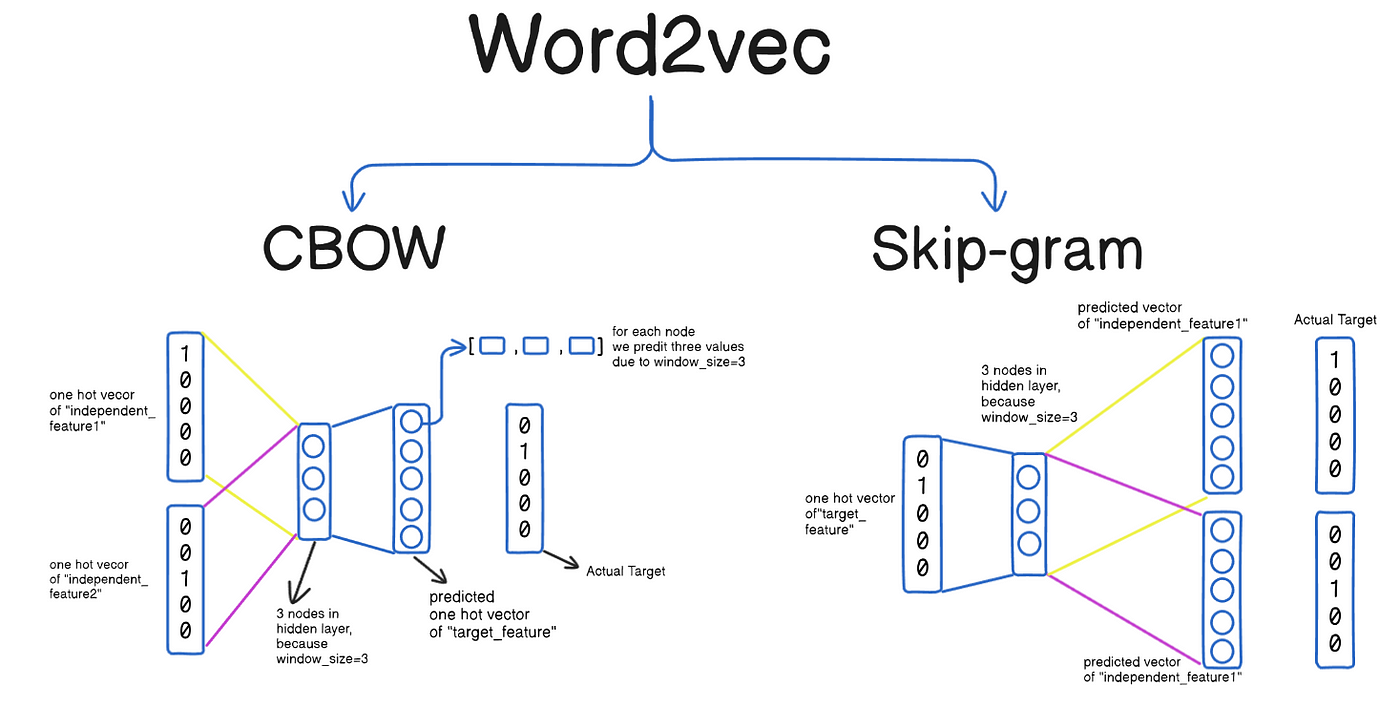

In [ ]:
vocab = set()
for sentence in sentences:
    for word in sentence:
        vocab.add(word)
word2id = {word: i for i, word in enumerate(vocab)}
id2word = {i: word for i, word in enumerate(vocab)}

In [ ]:
len(vocab)

64046

In [ ]:
CONTEXT_SIZE = 2
n_gram_list = []
# n_gram_list chứa context và target word dưới dạng ([list từ đằng trước + list từ đằng sau], target word)

for sentence_list in sentences:
  data = []
  for i in range(CONTEXT_SIZE, len(sentence_list) - CONTEXT_SIZE):
    context = (
        [sentence_list[i - j - 1] for j in range(CONTEXT_SIZE)]
        + [sentence_list[i + j + 1] for j in range(CONTEXT_SIZE)]
    )
    target = sentence_list[i]
    data.append((context, target))

  n_gram_list.extend(data)

In [ ]:
n_gram_list[0]

(['biomedical', 'as', 'becomes', 'increasingly'], 'technology')

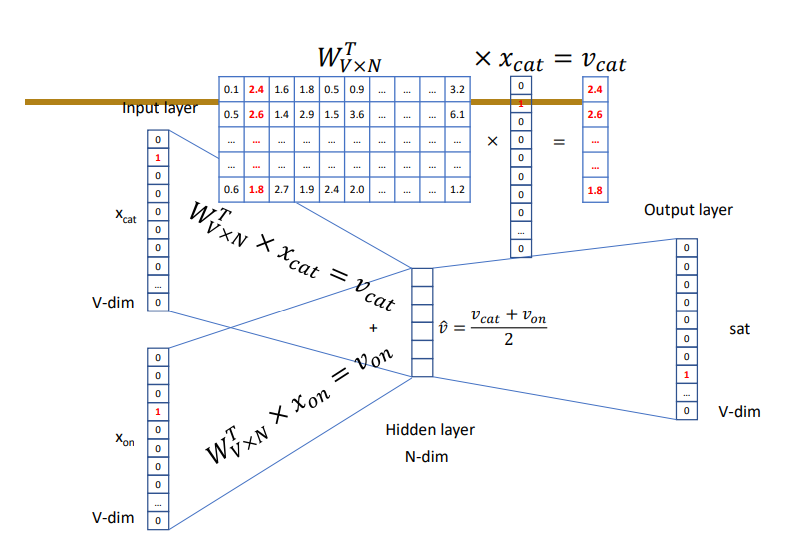

In [ ]:
from torch import nn, optim
import torch

class CBOW(nn.Module):
    def __init__(self, vocab_size, context_size, embedding_dim):
        super(CBOW, self).__init__()
        # code ở đây

    def forward(self, inputs):
        # code ở đây
        return log_probs

In [ ]:
from torch import nn, optim
import torch

class Skipgram(nn.Module):
    def __init__(self, vocab_size, context_size, embedding_dim):
        super(Skipgram, self).__init__()
        # code ở đây

    def forward(self, inputs):
        # code ở đây
        return log_probs_list

In [ ]:
EMBEDDING_DIM = 10
losses = []
loss_function = nn.NLLLoss()
model = CBOW(len(vocab), CONTEXT_SIZE, EMBEDDING_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in n_gram_list[:100]:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word2id[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        target_tensor = torch.zeros(len(vocab), dtype=torch.long)
        target_tensor[word2id[target]] = 1
        loss = loss_function(log_probs, target_tensor)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

# To get the embedding of a particular word, e.g. "beauty"
print(model.embeddings.weight[word2id["beauty"]])

<ipython-input-90-ca305ce61a02>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_probs = nn.functional.log_softmax(out)


RuntimeError: size mismatch (got input: [64046], target: [1])